In [1]:
from Wavefronts import *
from Storage_Merge import *

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.animation import FuncAnimation
from IPython import display

# More Efficient Algorithm

Intiate Algorithm 

In [2]:
Storage_Voltage_Active.append(Wavefront_Source(Voltage_Souce_Magnitude,0,Voltage_Source_Period_On,0))
Storage_Voltage_Active[0].about()

temp_wavefront = Storage_Voltage_Active.popleft()
temp_wavefront.Generate(Storage_Away,Storage_Away)
Storage_Voltage_Completed.append(temp_wavefront)


Some Information about a wavefront
Type :                             <class 'Wavefronts.Wavefront_Source'>
Poisiton Start :                   0
Poisiton End :                     0
Time Start :                       0
Time End :                         0.000012
Voltage Magnitude :                10
Current Magnitude :                0
Excitation Type :                  HIGH
Excitation Number :                0
Order :                            0
Inductive Reflections :            0
Capacitive Reflections :           0
Current Chain Reflections :        0
Transmission Ind -> Cap :          0
Transmission Cap -> Ind :          0


In [3]:
Process_Wavefronts()

In [4]:
def represent_Reflection_Diagram(ax):
    for wave in Storage_Capacitor_Completed:

        x1 = -wave.position_start
        x2 = -wave.position_end

        y1 = wave.time_start
        y2 = wave.time_end

        if(wave.time_start <=Simulation_Stop_Time):
            ax.plot([x1,x2],[y1,y2],'k-')


    for wave in Storage_Inductor_Completed:

        x1 = wave.position_start
        x2 = wave.position_end

        y1 = wave.time_start
        y2 = wave.time_end

        if(wave.time_start <=Simulation_Stop_Time):
            ax.plot([x1,x2],[y1,y2],'k-')

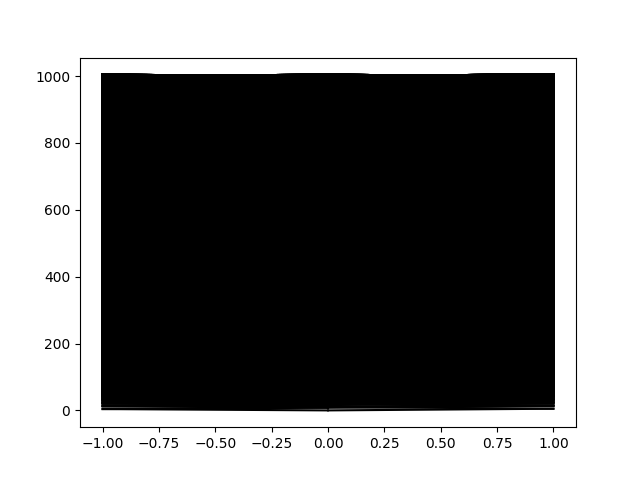

In [5]:
%matplotlib widget
#%matplotlib

fig_reflection, ax_reflection = plt.subplots()
represent_Reflection_Diagram(ax_reflection)

## Position Equirey -> Time Waveform

In [6]:
Voltage_Array_Capacitor = []
Current_Array_Capacitor = []
Time_Array_Capacitor = []

def inspect_time_waveform_at_position(Wavefront_Array, position):

    Voltage_Array = []
    Current_Array = []
    Time_Array = []

    found_index = True

    for wave in Wavefront_Array:
        
        time = wave.Time_at_position(position)

        try:
            index = Time_Array.index(time)
            found_index = True
        except:
            found_index = False

        if(found_index == False):
            Time_Array.append(time)
            Voltage_Array.append(wave.magnitude_voltage)
            Current_Array.append(wave.magnitude_current)
        else:
            Voltage_Array[index] = Voltage_Array[index] + wave.magnitude_voltage
            Current_Array[index] = Current_Array[index] + wave.magnitude_current

    Time_Voltage_Current_Array = sorted(zip(Time_Array,Voltage_Array,Current_Array))
    
    Time_Array, Voltage_Array, Current_Array  = zip(*Time_Voltage_Current_Array)

    Time_Array = list( Time_Array )
    Voltage_Array = list( Voltage_Array )
    Current_Array = list( Current_Array )

    for i in range(1,len(Voltage_Array)-1):
        Voltage_Array[i] = Voltage_Array[i-1]+Voltage_Array[i] 
        Current_Array[i] = Current_Array[i-1]+Current_Array[i] 

    return Voltage_Array, Current_Array, Time_Array

Plot Inductor Voltage

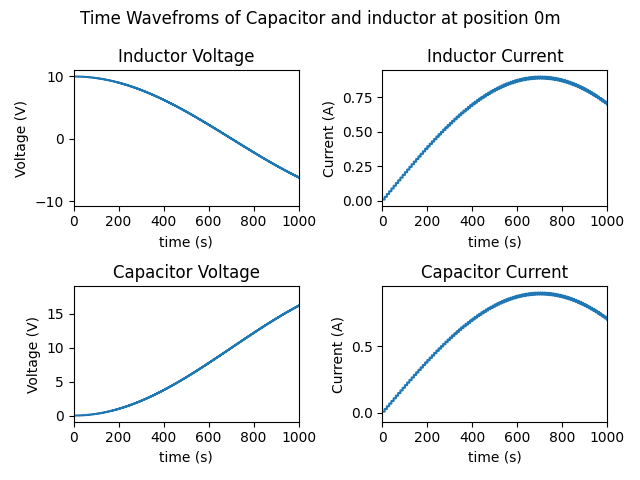

In [7]:
fig_time_wavefrom_at_position, axs_inductor = plt.subplots(2,2)

position = 0

Voltage_Inductor, Current_Inductor, Time_Inductor = inspect_time_waveform_at_position(Storage_Inductor_Completed,position)
Voltage_Capacitor, Current_Capacitor, Time_Capacitor = inspect_time_waveform_at_position(Storage_Capacitor_Completed,position)

axs_inductor[0,0].set_title('Inductor Voltage')
axs_inductor[0,0].set_xlabel('time (s)')
axs_inductor[0,0].set_ylabel('Voltage (V)')
axs_inductor[0,0].set_xlim(0,Simulation_Stop_Time)
axs_inductor[0,0].step(Time_Inductor ,Voltage_Inductor,where='post')

axs_inductor[0,1].set_title('Inductor Current')
axs_inductor[0,1].set_xlabel('time (s)')
axs_inductor[0,1].set_ylabel('Current (A)')
axs_inductor[0,1].set_xlim(0,Simulation_Stop_Time)
axs_inductor[0,1].step(Time_Inductor ,Current_Inductor,where='post')

axs_inductor[1,0].set_title('Capacitor Voltage')
axs_inductor[1,0].set_xlabel('time (s)')
axs_inductor[1,0].set_ylabel('Voltage (V)')
axs_inductor[1,0].set_xlim(0,Simulation_Stop_Time)
axs_inductor[1,0].step(Time_Capacitor ,Voltage_Capacitor,where='post')

axs_inductor[1,1].set_title('Capacitor Current')
axs_inductor[1,1].set_xlabel('time (s)')
axs_inductor[1,1].set_ylabel('Current (A)')
axs_inductor[1,1].set_xlim(0,Simulation_Stop_Time)
axs_inductor[1,1].step(Time_Capacitor ,Current_Capacitor,where='post')

title = "Time Wavefroms of Capacitor and inductor at position " +str(position)+"m"

fig_time_wavefrom_at_position.suptitle(title)
fig_time_wavefrom_at_position.tight_layout()

Save as CSV for anaylsis

Save Inductor Voltage

In [ ]:
dict = {'time':Time_Inductor, 'Voltage Inductor':Voltage_Inductor, 'Current Inductor':Current_Inductor}
data_frame = pd.DataFrame(dict)
data_frame.to_csv('Inductor_Voltage.csv',index=False)

In [ ]:
dict = {'time':Time_Capacitor, 'Voltage Capacitor':Voltage_Capacitor, 'Current Capacitor': Current_Capacitor}
data_frame = pd.DataFrame(dict)
data_frame.to_csv('Capacitor_Voltage.csv',index=False)

In [ ]:
def inspect_spatial_waveform_at_time(Wavefront_Array, time):
    
    Voltage_In_Position = []
    Current_In_Position = []
    Positions = []

    Current_Forward = []
    Current_Backward = []

    Voltage_Forward = []
    Voltage_Backward = []

    Positions_Forward = []
    Positions_Backward = []

    found_index = True

    query_time = time
    DC_Current = 0
    DC_Voltage = 0
    length = 0

    for wave in Wavefront_Array:

        position = 0
        length = wave.length

        position = wave.Position_at_time(query_time)

        if position >= 0:

            if wave.position_start == 0:
                try:
                    index = Positions_Forward.index(position)
                    found_index = True
                except:
                    found_index = False

                if found_index:
                    Current_Forward[index] += wave.magnitude_current
                    Voltage_Forward[index] += wave.magnitude_voltage
                else:
                    Positions_Forward.append(position)
                    Current_Forward.append(wave.magnitude_current)
                    Voltage_Forward.append(wave.magnitude_voltage)

                    Positions.append(position)

            else:
                try:
                    index = Positions_Backward.index(position)
                    found_index = True
                except:
                    found_index = False

                if found_index:
                    Current_Backward[index] += wave.magnitude_current
                    Voltage_Backward[index] += wave.magnitude_voltage
                else:
                    Positions_Backward.append(position)
                    Current_Backward.append(wave.magnitude_current)
                    Voltage_Backward.append(wave.magnitude_voltage)

                    Positions.append(position)


        elif wave.time_end <= query_time:
            DC_Current += wave.magnitude_current
            DC_Voltage += wave.magnitude_voltage

    Forward_Zip = list(zip(Positions_Forward,Voltage_Forward,Current_Forward))
    Backward_Zip = list(zip(Positions_Backward,Voltage_Backward,Current_Backward))

    #Remove doubles
    Positions = list(set(Positions))
    Positions = sorted(Positions)

    Positions.append(length)
    Positions = [0] + Positions

    Current_In_Position = [DC_Current]*len(Positions)
    Voltage_In_Position = [DC_Voltage]*len(Positions)

    # Current_In_Position_Sorted_Capacitor = sorted(zip(Positions,Current_In_Position))


    for pos,forward_voltage,forward_current in Forward_Zip:

        index = Positions.index(pos)

        for i in range(0,index):
            Current_In_Position[i] += forward_current
            Voltage_In_Position[i] += forward_voltage

    for pos,backward_voltage,backward_current in Backward_Zip:

        index = Positions.index(pos)

        for i in range(index,len(Positions)):
            Current_In_Position[i] += backward_current
            Voltage_In_Position[i] += backward_voltage

    return Voltage_In_Position,Current_In_Position,Positions

In [ ]:
fig_Current_In_Position_capacitor, (ax_Voltage_In_Position_capacitor, ax_Current_In_Position_capacitor) = plt.subplots(2,1)

time = Simulation_Stop_Time/2
Capacitor_Voltage_in_Position,Capacitor_Current_in_Position, Capacitor_Positions = inspect_spatial_waveform_at_time(Storage_Inductor_Completed,time)

ax_Voltage_In_Position_capacitor.set_title("Voltage")
ax_Voltage_In_Position_capacitor.set_xlabel('Position (m)')
ax_Voltage_In_Position_capacitor.set_ylabel('Voltage (V)')
ax_Voltage_In_Position_capacitor.step(Capacitor_Positions,Capacitor_Voltage_in_Position,where='post')

ax_Current_In_Position_capacitor.set_title("Current")
ax_Current_In_Position_capacitor.set_xlabel('Position (m)')
ax_Current_In_Position_capacitor.set_ylabel('Current (A)')
ax_Current_In_Position_capacitor.step(Capacitor_Positions,Capacitor_Current_in_Position,where='post')

title = "Spatial Waveform at : " + str(time) + "s"

fig_Current_In_Position_capacitor.suptitle(title)
fig_Current_In_Position_capacitor.tight_layout()

## Video Saving

# importing movie py libraries
from moviepy.editor import VideoClip
from moviepy.video.io.bindings import mplfig_to_npimage

duration = 10

fig, ax = plt.subplots()

def animate_pos(t):
    Voltage_Array_Capacitor = []
    Current_Array_Capacitor = []
    Time_Array_Capacitor = []
    time = 0

    t_decimal = Decimal(t)
    duration_decimal = Decimal(duration)

    for wave in Storage_Capacitor_Completed:


        time = wave.Time_at_position((t_decimal/duration_decimal)*Capacitor_Length)

        try:
            index = Time_Array_Capacitor.index(time)
        except:
            index = False

        if(index == False):
            Time_Array_Capacitor.append(time)
            Voltage_Array_Capacitor.append(wave.magnitude_voltage)
            Current_Array_Capacitor.append(wave.magnitude_current)
        else:
            Voltage_Array_Capacitor[index] = Voltage_Array_Capacitor[index] + wave.magnitude_voltage
            Current_Array_Capacitor[index] = Current_Array_Capacitor[index] + wave.magnitude_current

    #Time_Voltage_Array_Capacitor = sorted(zip(Time_Array_Capacitor,Voltage_Array_Capacitor))
    Time_Current_Array_Capacitor = sorted(zip(Time_Array_Capacitor,Current_Array_Capacitor))

    #x,y = zip(*Time_Voltage_Array_Capacitor)
    x,y = zip(*Time_Current_Array_Capacitor)

    x= list(x)
    y= list(y)

    for i in range(1,len(y)-1):
        y[i] = y[i-1]+y[i]

    ax.clear()
    
    ax.step(x,y,where='post')
    ax.set_xlim(0,Simulation_Stop_Time)
    #ax.set_ylim(-0.25,1.3)

    return mplfig_to_npimage(fig)

# creating animation
animation = VideoClip(animate_pos, duration = duration)
 
# saving animation
animation.write_videofile("my_animation.mp4", fps=30)


In [ ]:
# importing movie py libraries
from moviepy.editor import VideoClip
from moviepy.video.io.bindings import mplfig_to_npimage

duration = .5

fig, (ax,ax2) = plt.subplots(2,1)
fig.suptitle("Spatial Wavefroms of Inductor")

def animate_time(t):

    Capacitor_Voltage_in_Position , Capacitor_Current_in_Position , Capacitor_Positions = inspect_spatial_waveform_at_time(Storage_Inductor_Completed,Simulation_Stop_Time*Decimal(0.001*t/duration))

    ax.clear()
    ax2.clear()
    
    ax.step(Capacitor_Positions , Capacitor_Voltage_in_Position,where='post')
    ax.set_xlim(0,1)
    #ax.set_ylim(-0.8,3.6)

    ax.set_xlabel('position (m)')
    ax.set_ylabel('Voltage (V)')
    ax.set_title("Voltage in Inductor")


    ax2.step(Capacitor_Positions , Capacitor_Current_in_Position,where='post')
    ax2.set_xlim(0,1)
    #ax2.set_ylim(5.0204 ,5.0295)

    ax2.set_xlabel('position (m)')
    ax2.set_ylabel('Current (A)')
    ax2.set_title("Current in Inductor")

    fig.tight_layout()

    return mplfig_to_npimage(fig)

# creating animation
animation = VideoClip(animate_time, duration = duration)
 
# saving animation
animation.write_videofile("my_animation.mp4", fps=30)

In [ ]:
About_Network()